Accessing thermodynamic properties
-----------------------------
This is possible with `thermo` package, see documentations: https://thermo.readthedocs.io/en/latest/thermo.chemical.html

In [1]:
from thermo.chemical import Chemical
import matplotlib.pyplot as plt
import numpy as np

Chemicals can be accessed via name, CAS number, or SMILES

In [2]:
toluene = Chemical('toluene')
toluene = Chemical('108-88-3')
toluene = Chemical('SMILES=CC1=CC=CC=C1')

Accessing properties, by default they are returned for normal conditions 293.15 [K], 101325 [Pa]

In [3]:
print(toluene.MW) # Molecular weight
print(toluene.formula)
print(toluene.atoms)
print(toluene.InChI)
print(toluene.Tm, toluene.Tb, toluene.Tc) # Temperatures of melting, boiling and critical [K]

92.13842
C7H8
{'C': 7, 'H': 8}
C7H8/c1-7-5-3-2-4-6-7/h2-6H,1H3
179.2 383.75 591.75


Calculating properties for different conditions

In [4]:
toluene.calculate(T=200)
print(toluene.rho)
toluene.calculate(T=300)
print(toluene.rho)

948.6628180232887
862.3257851394108


### Calculating reaction enthalpy, enthropy and Gibbs energy:
Sample reaction is esterification of butyric acid: $\require{mhchem}$
$$
\ce{C3H7-CO-OH + CH3OH-> C3H7-CO-OCH3 + H2O}
$$
the reaction enthalpy is calulated using entalpies of formation $\Delta H_f$ for individual species:
$$
\Delta H_r = \sum_{products} \Delta H_f - \sum_{reagents} \Delta H_f
$$

In [7]:
BA = Chemical('butyric acid')
M = Chemical('methanol')
MB = Chemical('methyl butyrate')
W = Chemical('Water')

dHr = W.Hf + MB.Hf - M.Hf - BA.Hf
print(f'Reaction enthalpy: {dHr} [J/mol]')

Reaction enthalpy: -21540.0 [J/mol]


### Advanced example: plotting a range of properties for a range of compounds and various classes

In [143]:
c = ['C'*i for i in range(1,10)]

In [144]:
alkanes = [Chemical('SMILES='+i) for i in c]
alkenes = [Chemical('SMILES='+i+'=C') for i in c]
alkynes = [Chemical('SMILES='+i+'#C') for i in c]
alcohols = [Chemical('SMILES='+i+'O') for i in c]
aldehydes = [Chemical('SMILES='+i+'=O') for i in c]

In [145]:
def plot_property(chem, prop_x, prop_y):
    x = [c.__dict__[prop_x] for c in chem]
    y = [c.__dict__[prop_y] for c in chem]
    plt.scatter(x,y, label=chem[0].name)
    plt.title(prop_y+' vs '+prop_x)
    plt.xlabel(prop_x)
    plt.ylabel(prop_y)
    plt.legend()

Boiling temperature vs molecular weight

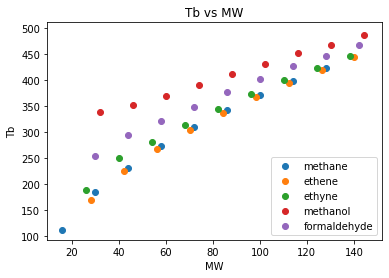

In [146]:
plot_property(alkanes, 'MW', 'Tb')
plot_property(alkenes, 'MW', 'Tb')
plot_property(alkynes, 'MW', 'Tb')
plot_property(alcohols, 'MW', 'Tb')
plot_property(aldehydes, 'MW', 'Tb')

Enthalpy of formation vs molecular weight

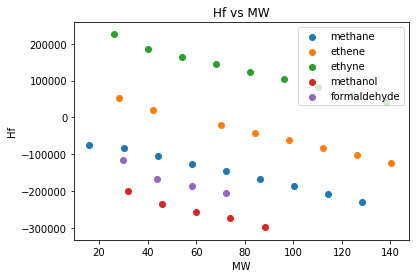

In [86]:
plot_property(alkanes, 'MW', 'Hf')
plot_property(alkenes, 'MW', 'Hf')
plot_property(alkynes, 'MW', 'Hf')
plot_property(alcohols, 'MW', 'Hf')
plot_property(aldehydes, 'MW', 'Hf')